In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
import time

from selenium import webdriver
from selenium.webdriver.support.ui import Select

In [2]:
# Locating chromedriver
browser = webdriver.Chrome(executable_path='/Users/Kevin/Chromedriver/chromedriver')
# Defining the url that we want to scrape data from
url = 'https://stats.nba.com/teams/boxscores/'
# Initializing browser/webdriver
browser.get(url)

time.sleep(2)

# Setting season to 2018-19 season
# First option is all season. Therefore we set it to option 3
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/div[1]/div[1]/div/div/label/select/option[3]').click()
# Setting season type to regular season
# First option is preseason. Therefore we set it to option 2
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/div[1]/div[2]/div/div/label/select/option[2]').click()

# Selecting & defining dropdown list that denotes the page of the table
select = Select(browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
# Defining the options of the dropdown list
options = select.options
# Creating blank string variable to store data
table = ""

# Looping through dropdown menu to show all pages except for the first instance which is 'all'
for index in range(1,len(options)):
#     Selecting the page
    select.select_by_index(index)
#     Adding string to storage varible
    table = table + '\n' + browser.find_element_by_class_name('nba-stat-table__overflow').text
    # Slowing down program to not overload servers
    # time.sleep(1)

# Closing webdriver
browser.quit()

In [3]:
# Separating the data with new line breaks
data_list = table.split('\n')

# Removing blank data
while("" in data_list) : 
    data_list.remove("") 
;

# Removing headers
while("TEAM MATCH UP GAME DATE W/L MIN PTS FGM FGA FG% 3PM 3PA 3P% FTM FTA FT% OREB DREB REB AST STL BLK TOV PF +/-" in data_list) : 
    data_list.remove("TEAM MATCH UP GAME DATE W/L MIN PTS FGM FGA FG% 3PM 3PA 3P% FTM FTA FT% OREB DREB REB AST STL BLK TOV PF +/-") 

In [4]:
#Check
data_list[0:5]

['MEM MEM vs. GSW 04/10/2019 W 240 132 48 98 49.0 21 46 45.7 15 18 83.3 15 34 49 25 9 0 11 18 15',
 'GSW GSW @ MEM 04/10/2019 L 240 117 46 92 50.0 13 30 43.3 12 14 85.7 9 30 39 32 3 5 14 17 -15',
 'ORL ORL @ CHA 04/10/2019 W 240 122 48 88 54.5 11 30 36.7 15 20 75.0 9 30 39 24 5 2 6 19 8',
 'CHA CHA vs. ORL 04/10/2019 L 240 114 41 78 52.6 8 29 27.6 24 27 88.9 4 28 32 21 3 4 8 14 -8',
 'MIN MIN @ DEN 04/10/2019 L 240 95 39 91 42.9 13 32 40.6 4 6 66.7 7 34 41 24 6 0 10 22 -4']

In [5]:
# Create lists of columns to store values
team = []
match_up_1 = []
match_up_2 = []
match_up_3 = []
game_date = []
win_loss = []
minutes = []
pts = []
fgm = []
fga = []
fg_percent = []
three_pm = []
three_pa = []
three_percent = []
ftm = []
fta = []
ft_percent = []
oreb = []
dreb = []
reb = []
ast = []
stl = []
blk = []
tov = []
pf = []
plus_minus = []

# Looping through data to import data into predefined lists
for index in data_list:
    # Separating the data within the rows
    row = index.split()
    # Adding data to respective list
    team.append(row[0])
    match_up_1.append(row[1])
    match_up_2.append(row[2])
    match_up_3.append(row[3])
    game_date.append(row[4])
    win_loss.append(row[5])
    minutes.append(row[6])
    pts.append(row[7])
    fgm.append(row[8])
    fga.append(row[9])
    fg_percent.append(row[10]) 
    three_pm.append(row[11])
    three_pa.append(row[12])
    three_percent.append(row[13])
    ftm.append(row[14])
    fta.append(row[15])
    ft_percent.append(row[16])
    oreb.append(row[17])
    dreb.append(row[18])
    reb.append(row[19])
    ast.append(row[20])
    stl.append(row[21])
    blk.append(row[22])
    tov.append(row[23])
    pf.append(row[24])
    plus_minus.append(row[25])

In [6]:
# Creating dataframe with list data
df = pd.DataFrame(list(zip(team,
                           match_up_1,
                           match_up_2,
                           match_up_3,
                           game_date,
                           win_loss,
                           minutes,
                           pts,
                           fgm,
                           fga,
                           fg_percent,
                           three_pm,
                           three_pa,
                           three_percent,
                           ftm,
                           fta,
                           ft_percent,
                           oreb,
                           dreb,
                           reb,
                           ast,
                           stl,
                           blk,
                           tov,
                           pf,
                           plus_minus)), 
                  columns =['TEAM',
                           'MATCH UP 1',
                           'MATCH UP 2',
                           'MATCH UP 3',
                           'GAME DATE',
                           'W/L',
                           'MIN',
                           'PTS',
                           'FGM',
                           'FGA',
                           'FG%',
                           '3PM',
                           '3PA',
                           '3P%',
                           'FTM',
                           'FTA',
                           'FT%',
                           'OREB',
                           'DREB',
                           'REB',
                           'AST',
                           'STL',
                           'BLK',
                           'TOV',
                           'PF',
                           '+/-'])

# Changing datatypes for each column to be used later
df = df.astype({'TEAM': 'category',
           'MATCH UP 1': 'category',
           'MATCH UP 2': 'category',
           'MATCH UP 3': 'category',
           'GAME DATE': 'datetime64',
           'W/L': 'category',
           'MIN': 'int',
           'PTS': 'int',
           'FGM': 'int',
           'FGA': 'int',
           'FG%': 'float',
           '3PM': 'int',
           '3PA': 'int',
           '3P%': 'float',
           'FTM': 'int',
           'FTA': 'int',
           'FT%': 'float',
           'OREB': 'int',
           'DREB': 'int',
           'REB': 'int',
           'AST': 'int',
           'STL': 'int',
           'BLK': 'int',
           'TOV': 'int',
           'PF': 'int',
           '+/-': 'int'
           })

In [7]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 26 columns):
TEAM          2460 non-null category
MATCH UP 1    2460 non-null category
MATCH UP 2    2460 non-null category
MATCH UP 3    2460 non-null category
GAME DATE     2460 non-null datetime64[ns]
W/L           2460 non-null category
MIN           2460 non-null int64
PTS           2460 non-null int64
FGM           2460 non-null int64
FGA           2460 non-null int64
FG%           2460 non-null float64
3PM           2460 non-null int64
3PA           2460 non-null int64
3P%           2460 non-null float64
FTM           2460 non-null int64
FTA           2460 non-null int64
FT%           2460 non-null float64
OREB          2460 non-null int64
DREB          2460 non-null int64
REB           2460 non-null int64
AST           2460 non-null int64
STL           2460 non-null int64
BLK           2460 non-null int64
TOV           2460 non-null int64
PF            2460 non-null int64
+/-          

In [8]:
# Check
df.head()

,TEAM,MATCH UP 1,MATCH UP 2,MATCH UP 3,GAME DATE,W/L,MIN,PTS,FGM,FGA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,MEM,MEM,vs.,GSW,2019-04-10,W,240,132,48,98,...,83.3,15,34,49,25,9,0,11,18,15
1,GSW,GSW,@,MEM,2019-04-10,L,240,117,46,92,...,85.7,9,30,39,32,3,5,14,17,-15
2,ORL,ORL,@,CHA,2019-04-10,W,240,122,48,88,...,75.0,9,30,39,24,5,2,6,19,8
3,CHA,CHA,vs.,ORL,2019-04-10,L,240,114,41,78,...,88.9,4,28,32,21,3,4,8,14,-8
4,MIN,MIN,@,DEN,2019-04-10,L,240,95,39,91,...,66.7,7,34,41,24,6,0,10,22,-4


# Data Analysis

Now that we have the data prepped. We can now use the data to answer the questions that we are interested in.
The questions that I am interested in are (Out of my own curiosity):
1. What does the point totals for each team look like throughout the season?
2. How many overtimes took place in the season?
3. Which team had the most rebounds?

# 1. What does the point totals for each team look like throughout the season?

In [9]:
# Finding the list of team names
teams = df['TEAM'].unique()
teams.categories

Index(['MEM', 'GSW', 'ORL', 'CHA', 'MIN', 'DEN', 'ATL', 'IND', 'MIL', 'OKC',
       'SAC', 'POR', 'LAC', 'UTA', 'BKN', 'MIA', 'NYK', 'DET', 'SAS', 'DAL',
       'PHI', 'CHI', 'NOP', 'HOU', 'BOS', 'WAS', 'TOR', 'PHX', 'CLE', 'LAL'],
      dtype='object')

In [10]:
# Creating different datasets based on the team to be graphed
df_GSW = df.loc[df['TEAM'] == 'GSW']
df_MEM = df.loc[df['TEAM'] == 'MEM']
df_ORL = df.loc[df['TEAM'] == 'ORL']
df_CHA = df.loc[df['TEAM'] == 'CHA']
df_MIN = df.loc[df['TEAM'] == 'MIN']
df_DEN = df.loc[df['TEAM'] == 'DEN']
df_MIL = df.loc[df['TEAM'] == 'MIL']
df_OKC = df.loc[df['TEAM'] == 'OKC']
df_ATL = df.loc[df['TEAM'] == 'ATL']
df_IND = df.loc[df['TEAM'] == 'IND']
df_SAC = df.loc[df['TEAM'] == 'SAC']
df_POR = df.loc[df['TEAM'] == 'POR']
df_LAC = df.loc[df['TEAM'] == 'LAC']
df_UTA = df.loc[df['TEAM'] == 'UTA']
df_MIA = df.loc[df['TEAM'] == 'MIA']
df_BKN = df.loc[df['TEAM'] == 'BKN']
df_DET = df.loc[df['TEAM'] == 'DET']
df_NYK = df.loc[df['TEAM'] == 'NYK']
df_SAS = df.loc[df['TEAM'] == 'SAS']
df_DAL = df.loc[df['TEAM'] == 'DAL']
df_PHI = df.loc[df['TEAM'] == 'PHI']
df_CHI = df.loc[df['TEAM'] == 'CHI']
df_NOP = df.loc[df['TEAM'] == 'NOP']
df_HOU = df.loc[df['TEAM'] == 'HOU']
df_BOS = df.loc[df['TEAM'] == 'BOS']
df_WAS = df.loc[df['TEAM'] == 'WAS']
df_TOR = df.loc[df['TEAM'] == 'TOR']
df_PHX = df.loc[df['TEAM'] == 'PHX']
df_CLE = df.loc[df['TEAM'] == 'CLE']
df_LAL = df.loc[df['TEAM'] == 'LAL']

# Creating the names of the dataset to be used in plot title
df_GSW.name = 'GSW'
df_MEM.name = 'MEM'
df_ORL.name = 'ORL'
df_CHA.name = 'CHA'
df_MIN.name = 'MIN'
df_DEN.name = 'DEN'
df_MIL.name = 'MIL'
df_OKC.name = 'OKC'
df_ATL.name = 'ATL'
df_IND.name = 'IND'
df_SAC.name = 'SAC'
df_POR.name = 'POR'
df_LAC.name = 'LAC'
df_UTA.name = 'UTA'
df_MIA.name = 'MIA'
df_BKN.name = 'BKN'
df_DET.name = 'DET'
df_NYK.name = 'NYK'
df_SAS.name = 'SAS'
df_DAL.name = 'DAL'
df_PHI.name = 'PHI'
df_CHI.name = 'CHI'
df_NOP.name = 'NOP'
df_HOU.name = 'HOU'
df_BOS.name = 'BOS'
df_WAS.name = 'WAS'
df_TOR.name = 'TOR'
df_PHX.name = 'PHX'
df_CLE.name = 'CLE'
df_LAL.name = 'LAL'

# Creating list of datasets to be looped through 
df_list = [
    df_GSW, 
    df_MEM,
    df_ORL, 
    df_CHA, 
    df_MIN, 
    df_DEN, 
    df_MIL, 
    df_OKC, 
    df_ATL, 
    df_IND, 
    df_SAC, 
    df_POR, 
    df_LAC, 
    df_UTA, 
    df_MIA, 
    df_BKN, 
    df_DET, 
    df_NYK, 
    df_SAS, 
    df_DAL, 
    df_PHI, 
    df_CHI, 
    df_NOP, 
    df_HOU, 
    df_BOS, 
    df_WAS, 
    df_TOR, 
    df_PHX, 
    df_CLE, 
    df_LAL
    ]

In [11]:
# Defining function to plot each team's dataset
def plot_1(df):
    
    #creating temporary datasets to separate the wins and losses by color
    temp_win_df = df[df['W/L'] == 'W']
    temp_lose_df = df[df['W/L'] == 'L']
    
    #plotting barcharts
    plt.figure(figsize=(20,5))
    plt.title(df.name)
    plt.bar(x='GAME DATE', height='PTS', data=temp_win_df, color = '#1f77b4')
    plt.bar(x='GAME DATE', height='PTS', data=temp_lose_df, color = '#ff7f0e')

/Users/Kevin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/Users/Kevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


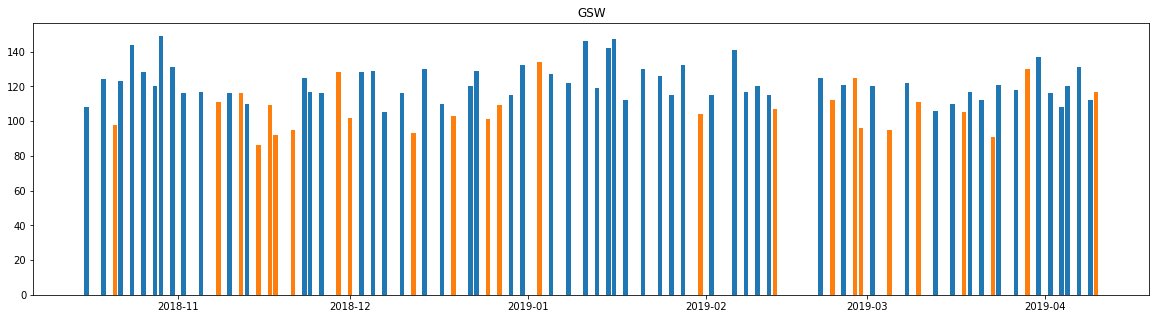

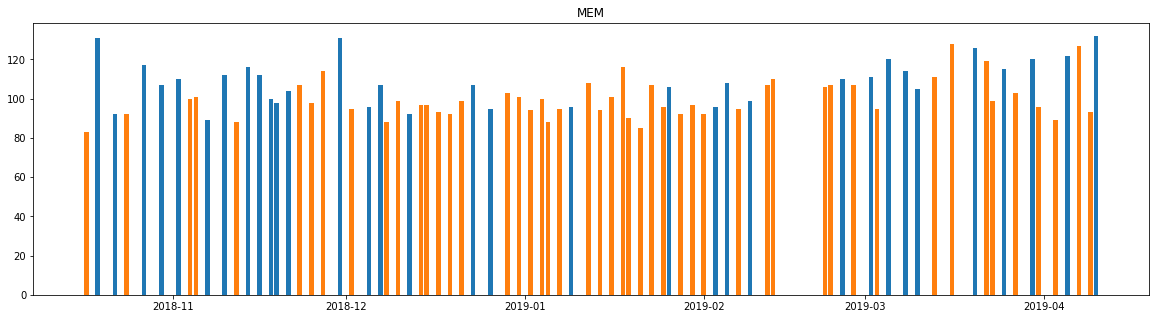

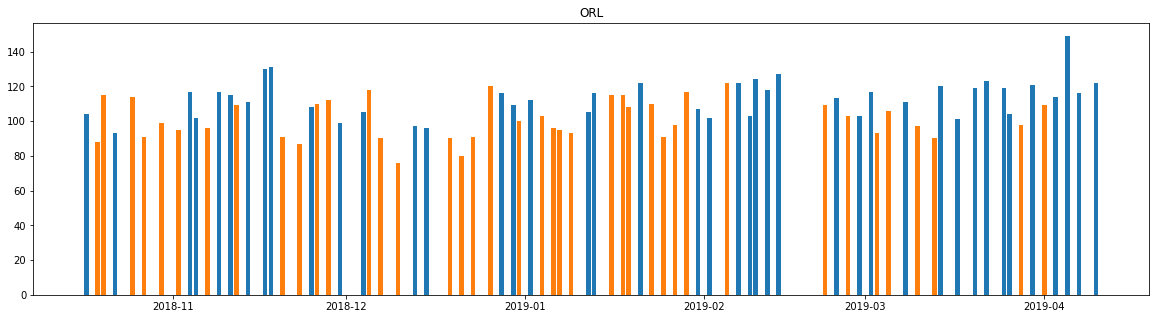

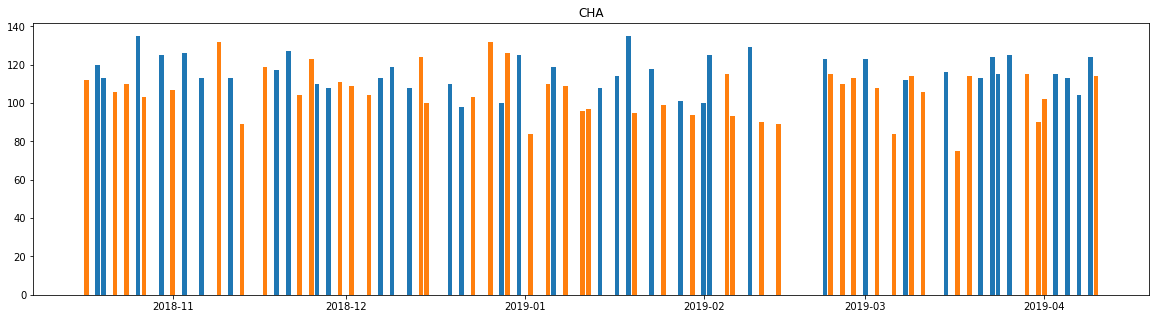

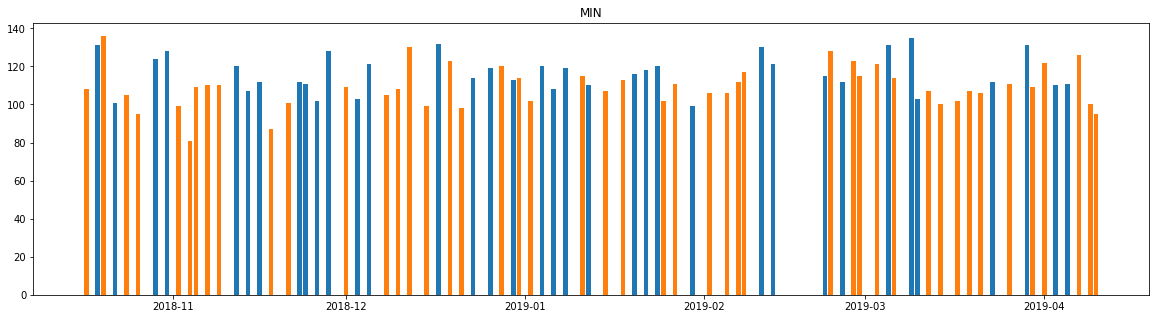

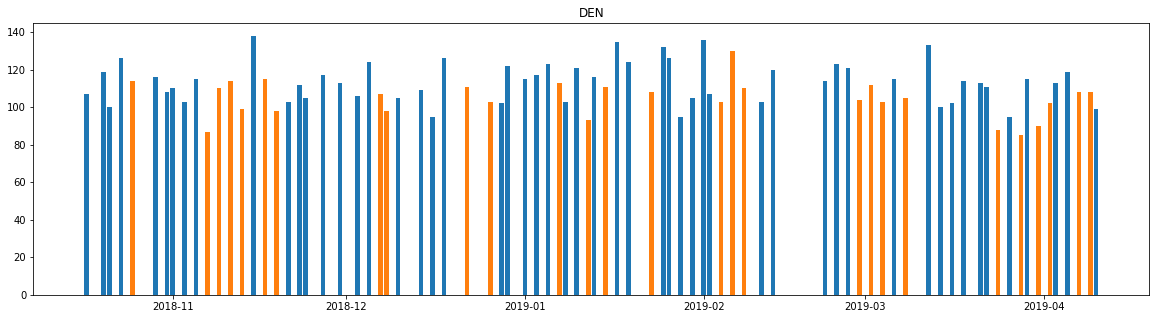

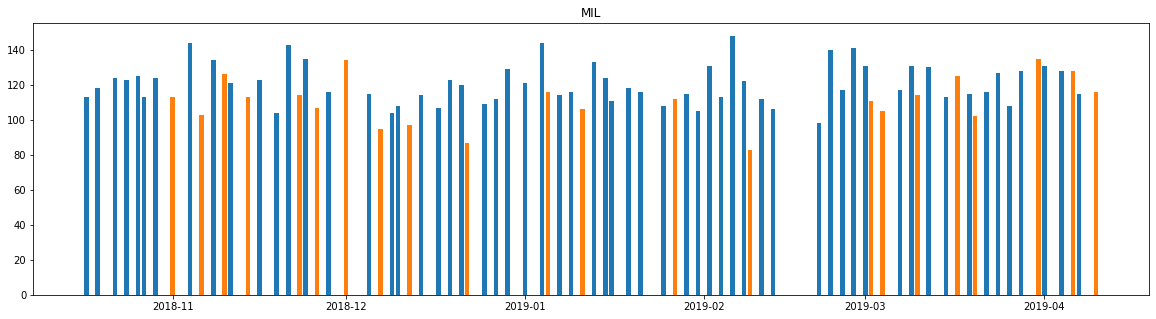

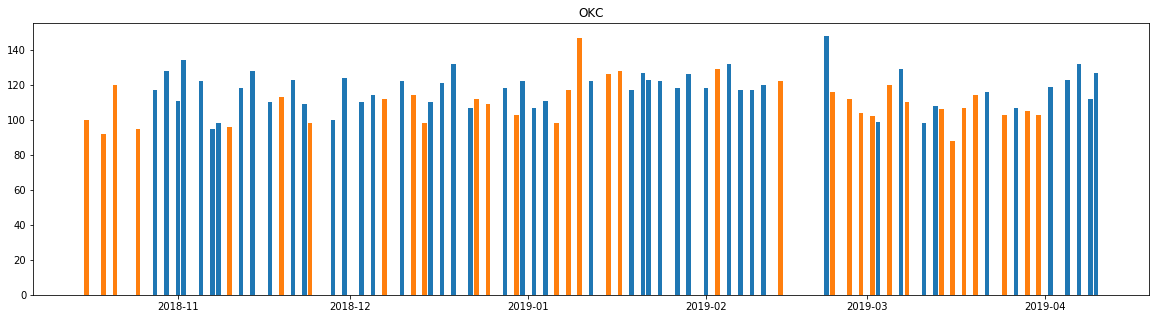

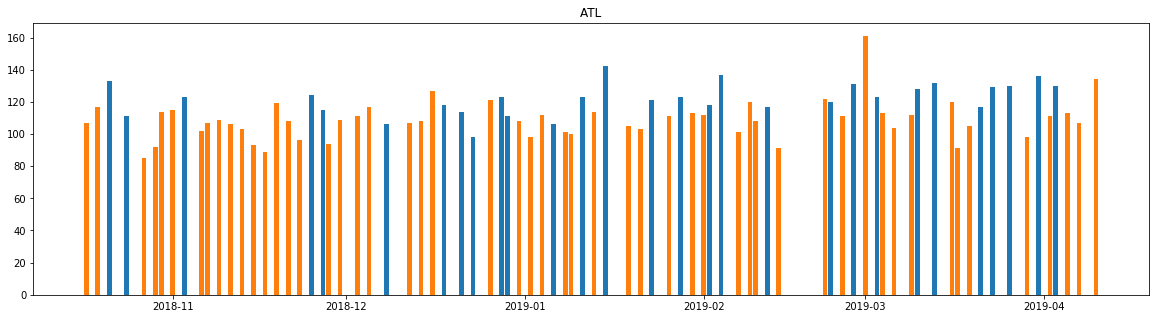

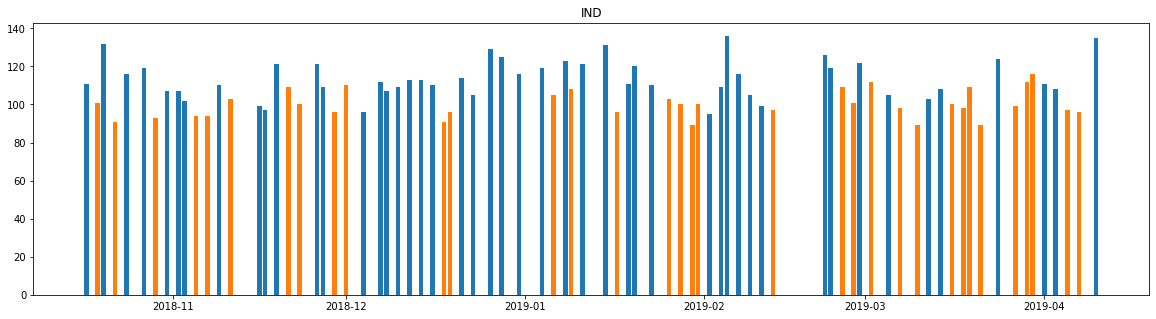

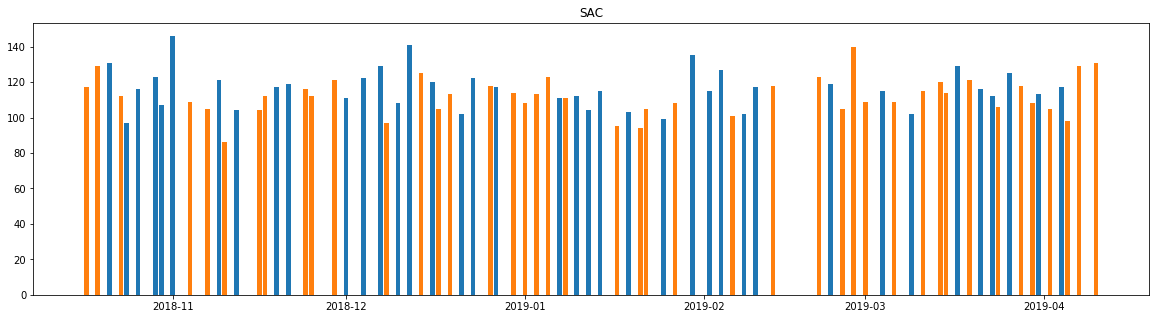

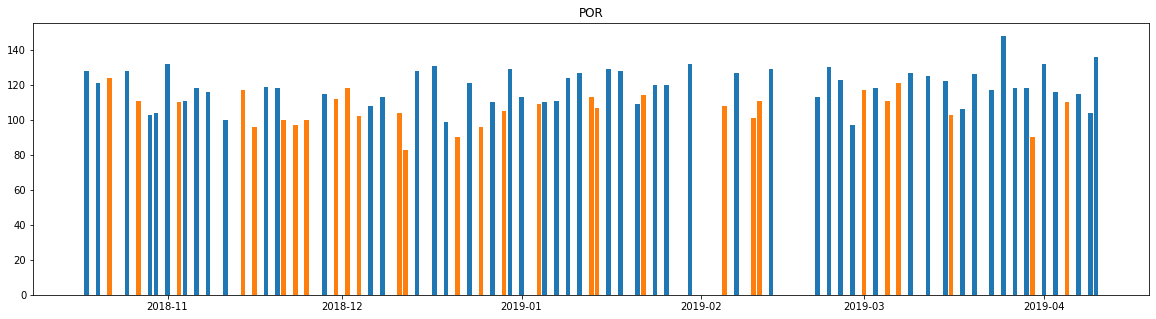

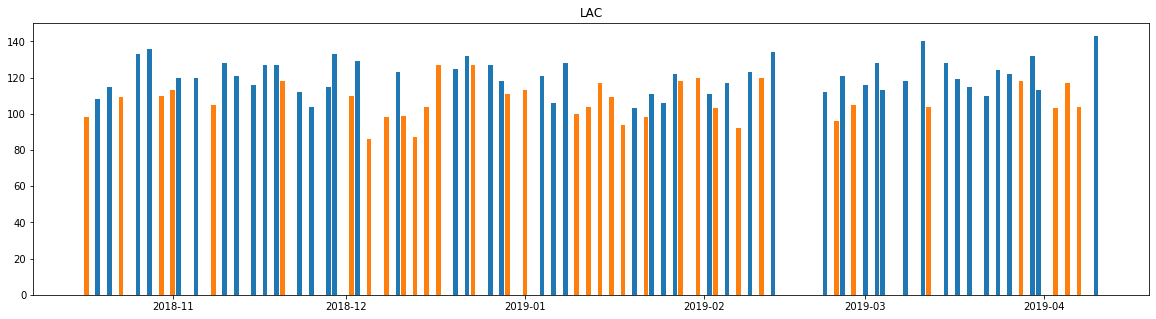

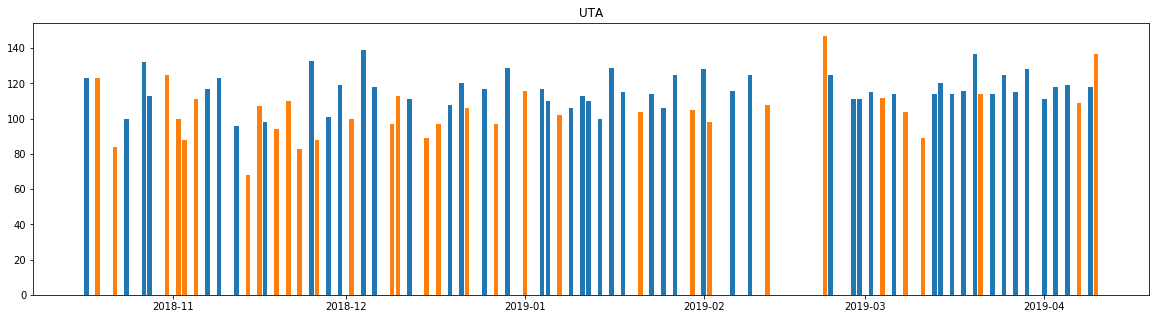

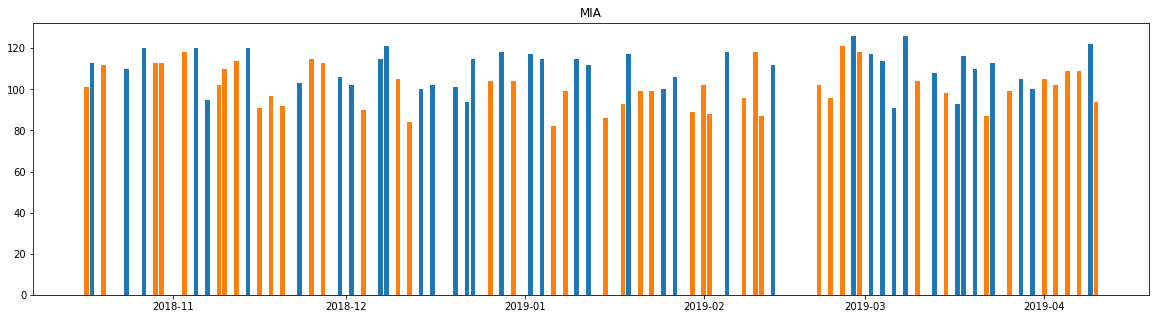

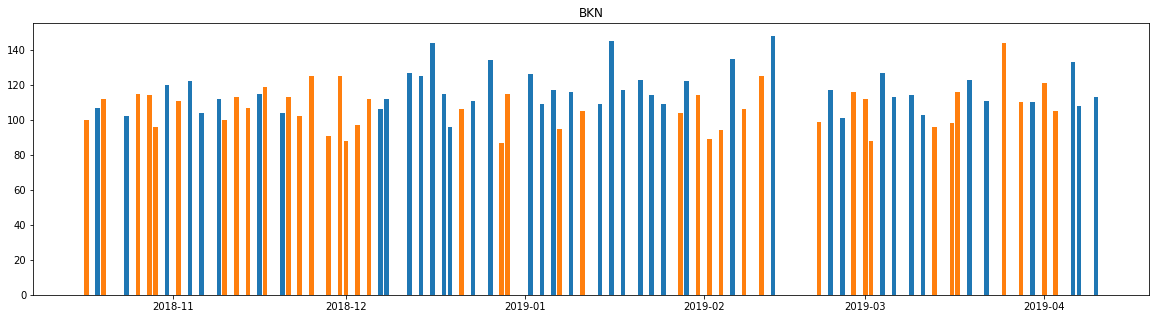

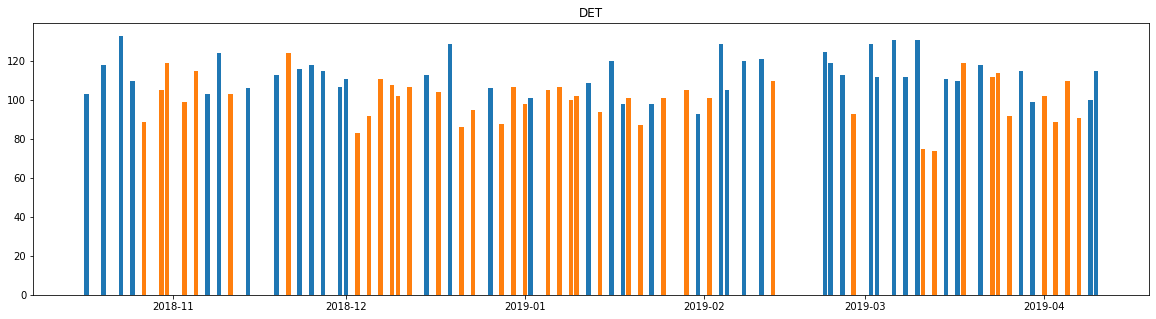

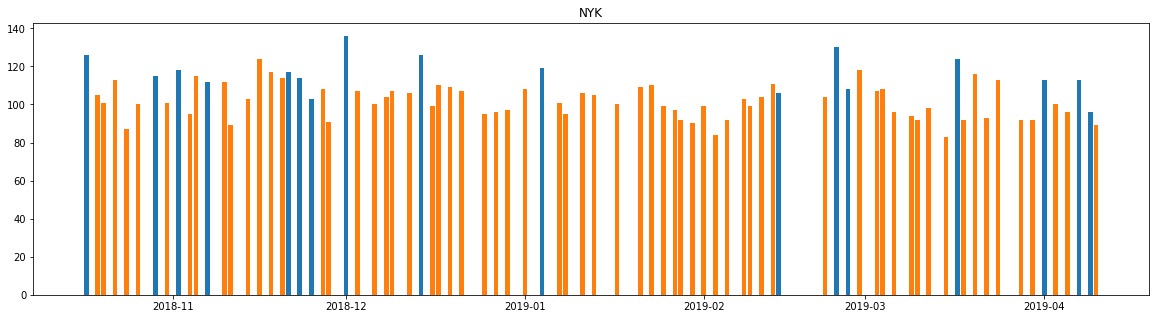

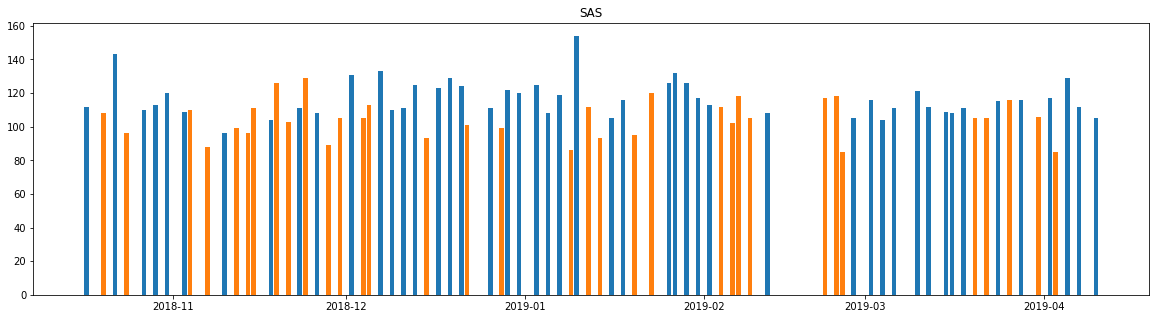

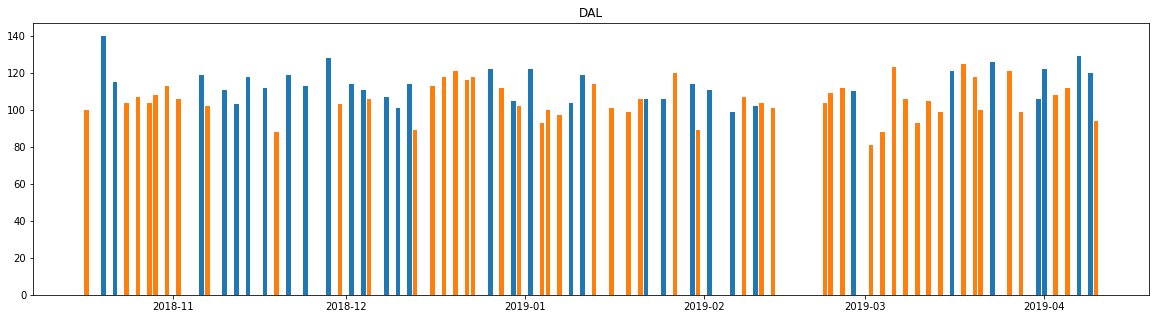

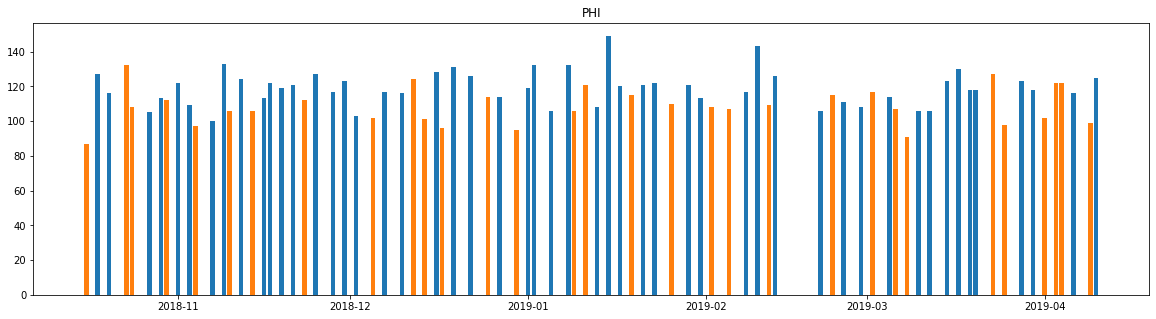

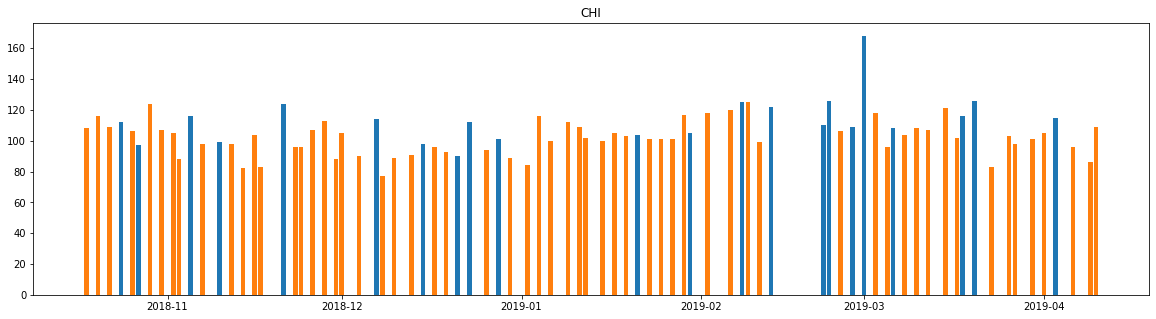

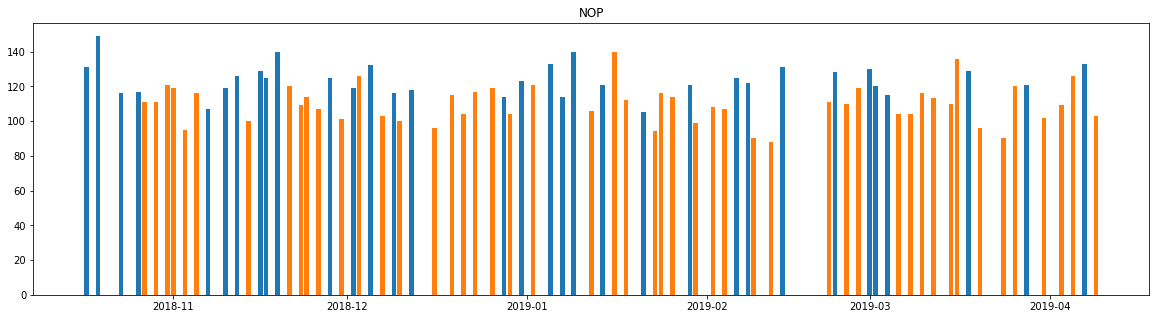

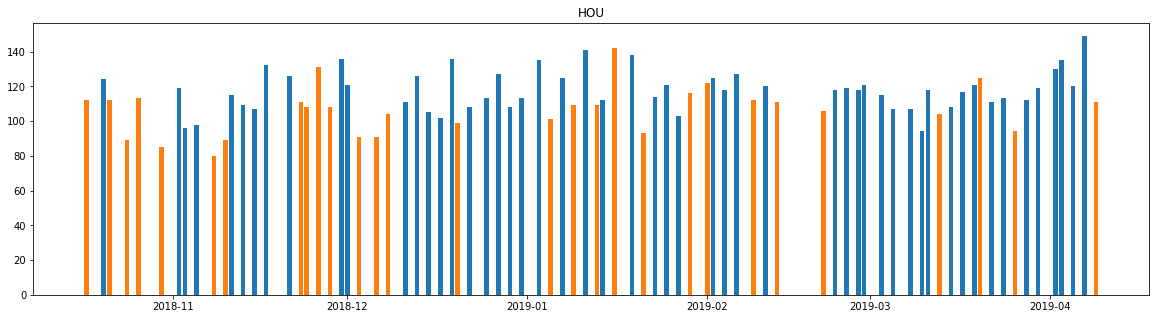

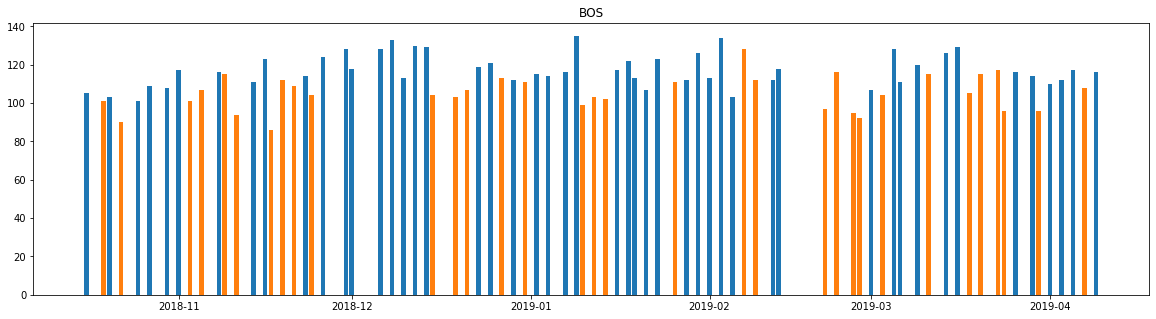

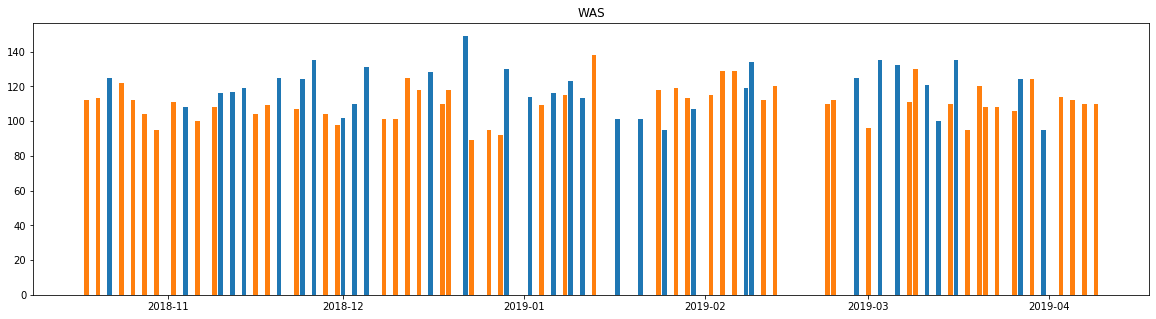

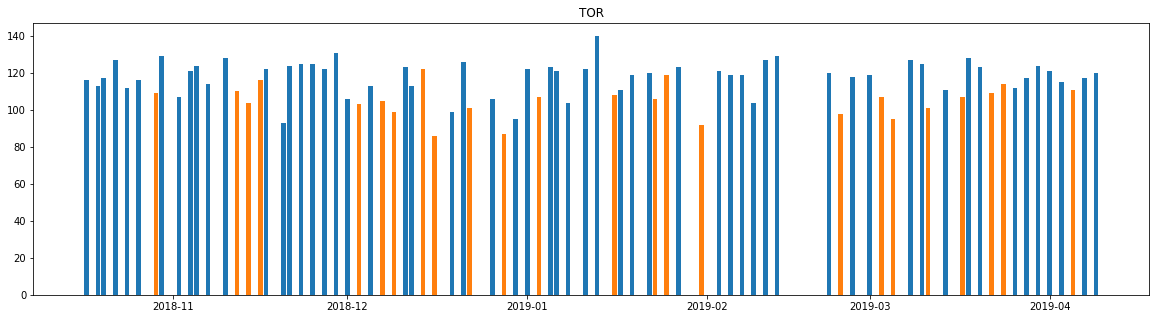

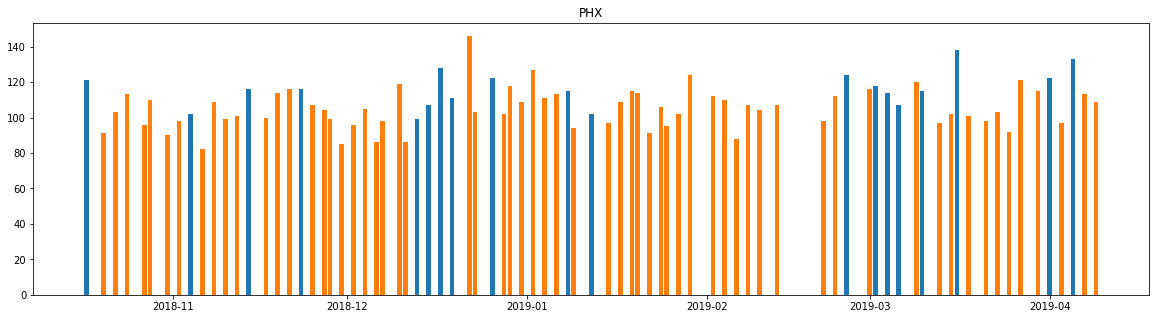

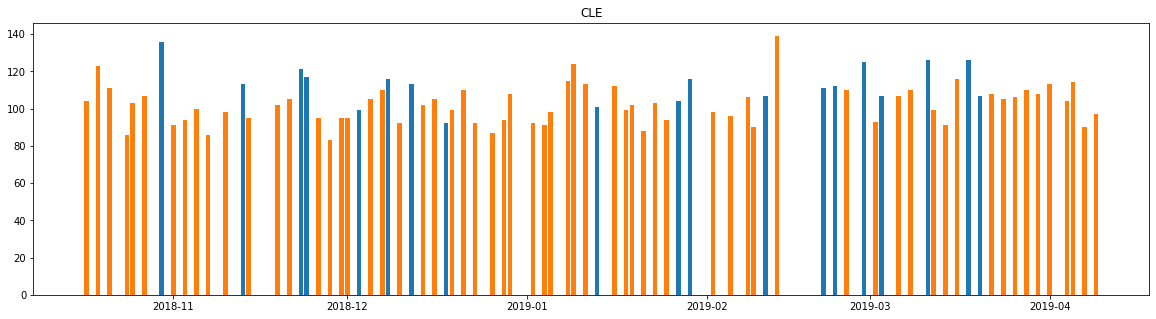

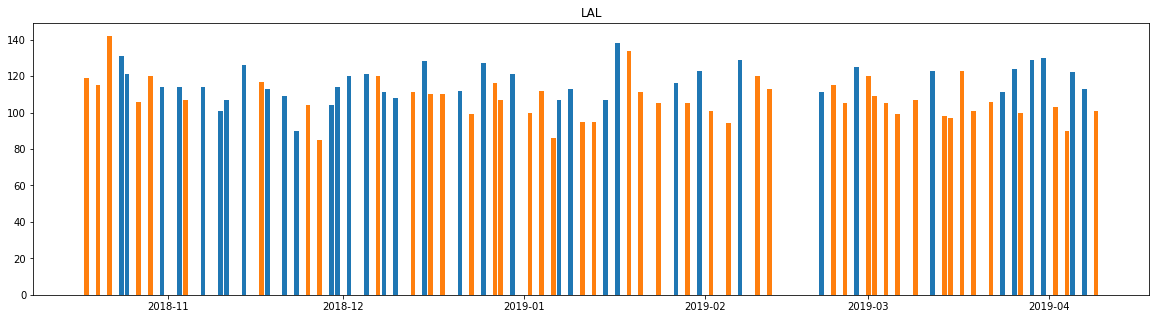

In [12]:
# Plotting every teams points throughout the season 
for x in df_list:
    plot_1(x)

Above is a bar chart that shows each team and their point totals for each game, and whether or not they won or lost the game. Wins are denoted by the color blue and lost games are orange. 

I find this to be very interesting, since you can see a teams progress throughout the season in an easily digestible format. 

For example we can see that the Golden State Warriors (GSW) had a very successful regular season, since majority of their games are blue, and you can also see that they had a few high scoring games close to 140 points. 

In contrast, looking at the Memphis Grizzlies (MEM) they had a very unsuccessful season since majority of the graph is orange, and a lot of their games end with less than 100 points. 

Other things I want to point out:
- You can see when the All Star break happens and how the team  performs after the break. The break occurs during the end of February. 
- The worst team of the season is clearly the New York Knicks (NYK)
- Chicago Bulls (CHI) had a terrible season but won one game with over 160 total points! The game was against the Atlanta Hawks and that was the game that went into quadruple overtime. https://stats.nba.com/game/0021800928/
- The team that won the championship that year, the Toronto Raptors (TOR), appears to have a very consistent season. Where on winning games they scored close to 120 total points. 


# 2. How many overtimes took place in the season?

In [13]:
# Finding total mins played
minutes = df['MIN'].unique()
minutes

array([240, 265, 290, 340, 315])

We need to divide the total mins by 5 since there are 5 players on the court at any given time. 

For example if we divide 240/5 = 48 mins, which is the length of a normal basketball game. 

There are 12 mins in each quarter, therefor 12 * 4 = 48.

Each overtime is an additional 5 mins. 

In [14]:
# Check 
print(240/5)
print(265/5)
print(290/5)
print(315/5)
print(340/5)

48.0
53.0
58.0
63.0
68.0


Therefore we know that 240 total mins is regulation time.

265 is the first overtime

290 is double overtime

315 is triple overtime

340 is quadruple overtime

In [15]:
# Counting the values of the total minutes 
# Need to divide by 2 since the dataset contains both home and away teams for a single game
df['MIN'].value_counts()/2

240    1163.0
265      57.0
290       7.0
315       2.0
340       1.0
Name: MIN, dtype: float64

From this we can see there are:
- 1163 regulation time games
- 57 single overtime games
- 7 double overtime games
- 2 triple overtime games
- 1 quadruple overtime game

As a check:

There are 30 teams that play 82 games a year. 30 * 82 = 2460.

Therefore we would expect a total of 2460/2 = 1230 games a year. Note that we have to divide by two since there are two teams played per game.  

In [16]:
print('Total games a year '+ str(30*82/2))
print('Check counts ' + str(1163+57+7+2+1))

Total games a year 1230.0
Check counts 1230


# 3. Which team had the most rebounds?

In [17]:
# Counting the total rebounds in the season
df['REB'].sum()

111107

In [18]:
# Counting the total rebounds split by team
team_reb = df.groupby(['TEAM'])['REB'].sum()
print(team_reb)

TEAM
ATL    3780
BKN    3819
BOS    3653
CHA    3592
CHI    3517
CLE    3498
DAL    3716
DEN    3804
DET    3688
GSW    3787
HOU    3449
IND    3528
LAC    3732
LAL    3820
MEM    3426
MIA    3800
MIL    4078
MIN    3673
NOP    3878
NYK    3668
OKC    3942
ORL    3724
PHI    3917
PHX    3311
POR    3935
SAC    3725
SAS    3667
TOR    3706
UTA    3801
WAS    3473
Name: REB, dtype: int64


In [19]:
# Since we created a series we need to use '.idxmax' and '.max' to find the team with the most rebounds
print(team_reb.idxmax(0))
print(team_reb.max(0))

MIL
4078


In [20]:
# Produing the aggregate table of all columns out of curiousity. Some columns do not make sense in this scenario.
df.groupby(['TEAM']).sum()

,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
TEAM,,,,,,,,,,,,,,,,,,,,
ATL,19855,9294,3392,7524,3704.6,1067,3034,2878.0,1443,1918,6164.9,955,2825,3780,2118,675,419,1397,1932,-494
BKN,19980,9204,3301,7358,3686.9,1047,2965,2892.8,1555,2088,6123.1,900,2919,3819,1954,539,339,1236,1763,-6
BOS,19780,9216,3451,7423,3819.8,1032,2829,2976.7,1282,1598,6612.3,804,2849,3653,2155,706,435,1052,1670,364
CHA,19830,9081,3297,7362,3679.3,977,2783,2879.9,1510,1895,6498.4,814,2778,3592,1905,591,405,1001,1550,-90
CHI,19905,8605,3266,7205,3724.3,745,2123,2863.3,1328,1695,6464.0,718,2799,3517,1796,603,351,1159,1663,-690
CLE,19755,8567,3189,7184,3647.0,847,2388,2886.6,1342,1694,6446.8,879,2619,3498,1698,534,195,1106,1642,-788
DAL,19780,8927,3182,7122,3670.8,1022,3002,2799.9,1541,2076,6080.5,832,2884,3716,1918,533,351,1167,1650,-105
DEN,19730,9075,3439,7384,3829.0,903,2571,2867.6,1294,1714,6263.0,972,2832,3804,2245,634,363,1102,1644,324
DET,19855,8778,3185,7238,3617.0,993,2854,2835.4,1415,1893,6171.9,936,2752,3688,1845,569,331,1135,1811,-20
